In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./data/Dataset.csv")

In [3]:
df.head()

,Food,Calories/100g,Fat/100g,Carbohydrates/100g,Protein/100g,Cholesterol/100g,Sodium/100g
0,Nuts,614.3,53.6,21.4,20.4,0.0,275.0
1,Seeds,550.0,43.0,30.0,19.0,0.0,31.0
2,Cookie,493.3,24.7,66.7,5.0,0.0,310.0
3,Kind bar,450.0,37.5,40.0,15.0,0.0,350.0
4,Kind oats and honey,428.6,14.3,65.7,8.6,0.0,271.4


In [4]:
#checking null values
print(df.isnull().sum())

Food                   0
Calories/100g          0
Fat/100g               0
Carbohydrates/100g     0
Protein/100g           0
Cholesterol/100g      10
Sodium/100g           10
dtype: int64


In [5]:
#imputing 0 for null in Cholesterol/100g and Sodium/100g
df[['Cholesterol/100g', 'Sodium/100g']] = df[['Cholesterol/100g', 'Sodium/100g']].fillna(0)

In [6]:
#verifying all columns filled
print(df.isnull().sum())

Food                  0
Calories/100g         0
Fat/100g              0
Carbohydrates/100g    0
Protein/100g          0
Cholesterol/100g      0
Sodium/100g           0
dtype: int64


In [7]:
# Standardizing the data, dropping non-numeric feature "Food"
features = df.drop(columns='Food')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [8]:
# Performing PCA
pca = PCA()
pca.fit_transform(scaled_features)

array([[-1.57277354e+00,  3.17180806e+00, -8.12711832e-01,
        -3.67528586e-01, -1.17937457e+00,  1.71925144e-02],
       [-1.37059204e+00,  1.98841623e+00, -1.42413244e+00,
        -4.81490430e-01, -8.53900184e-01,  4.21649817e-02],
       [-1.76723061e+00,  3.85385097e-01,  4.52397845e-01,
         3.01024489e-01,  1.11666523e-01,  1.19808967e-03],
       ...,
       [ 2.19422542e+00,  1.58766865e+00, -1.62619456e+00,
        -6.24749243e-02,  6.45920459e-01, -3.85792876e-02],
       [-9.08138871e-01, -1.18744494e+00, -3.54958689e-01,
        -2.31584856e-01,  4.80456611e-01,  3.64962045e-02],
       [-8.39888389e-01,  1.74876693e-01, -8.72623126e-01,
        -8.57357143e-01,  1.40819324e-01,  1.86695244e-02]])

In [9]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

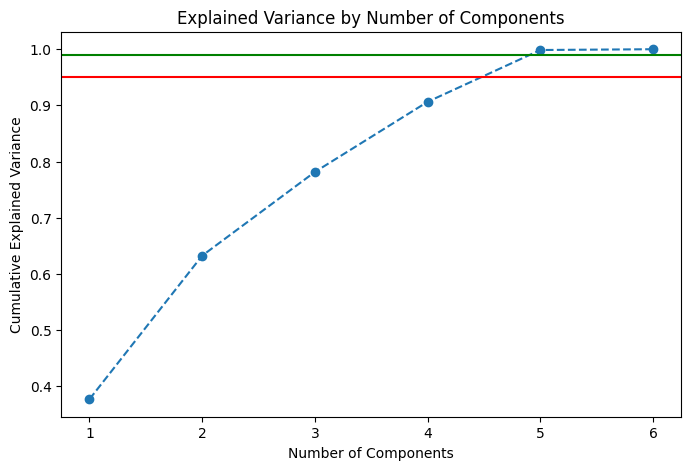

In [12]:
# Plotting cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axhline(y=0.99, color='g', linestyle='-')
plt.show()

In [13]:
# Determining number of components to retain 95% variance
n_components = next(i for i, cumulative_variance in enumerate(cumulative_explained_variance) if cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 5


In [14]:
#rerunning pca with 5 components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

In [16]:
#creating new dataframe with prinicipal components
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)
pca_df = pd.concat([df[['Food']], pca_df], axis=1)

In [17]:
pca_df.to_csv('data_with_prinicipal')

,Food,PC1,PC2,PC3,PC4,PC5
0,Nuts,-1.572774,3.171808,-0.812712,-0.367529,-1.179375
1,Seeds,-1.370592,1.988416,-1.424132,-0.481490,-0.853900
2,Cookie,-1.767231,0.385385,0.452398,0.301024,0.111667
3,Kind bar,-1.050426,1.680369,0.059138,-0.227879,-0.660586
4,Kind oats and honey,-1.130156,-0.143045,0.425969,-0.218507,0.371054


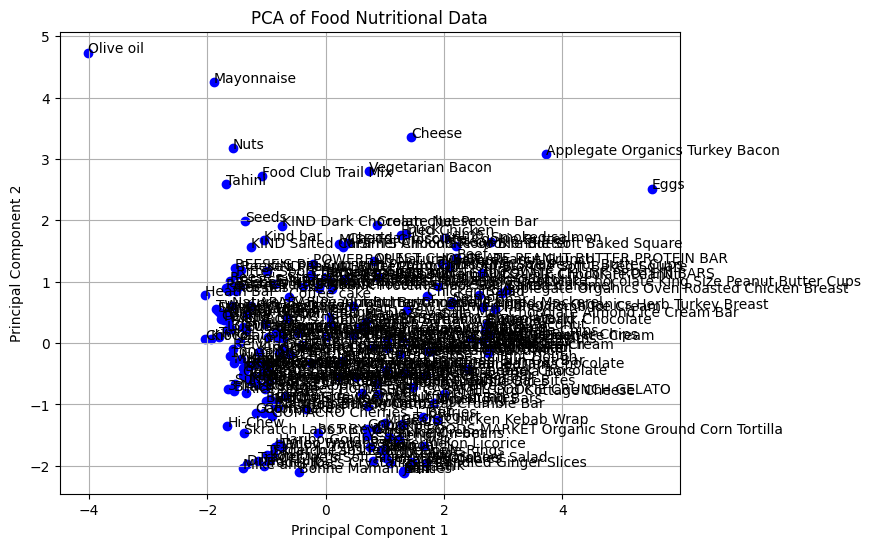

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue')
for i, food in enumerate(pca_df['Food']):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], food)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Nutritional Data')
plt.grid()
plt.show()

In [23]:
loadings_pc1 = pca.components_[0]
loadings_pc2 = pca.components_[1]

loadings_df_pc1 = pd.DataFrame(loadings_pc1, index=features.columns, columns=['PC1'])
loadings_df_pc2 = pd.DataFrame(loadings_pc2, index=features.columns, columns=['PC2'])

print("Loadings for PC1:")
print(loadings_df_pc1)
print("\n")
print("Loadings for PC2:")
print(loadings_df_pc2)


Loadings for PC1:
                         PC1
Calories/100g      -0.574599
Fat/100g           -0.331135
Carbohydrates/100g -0.547830
Protein/100g        0.285645
Cholesterol/100g    0.410549
Sodium/100g         0.099615


Loadings for PC2:
                         PC2
Calories/100g       0.371257
Fat/100g            0.619088
Carbohydrates/100g -0.243986
Protein/100g        0.426020
Cholesterol/100g    0.304522
Sodium/100g         0.380976
